In [1]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent/'src'))
from data import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from fastai.data.all import *
from fastai.vision.all import *

## Get kaggle data

### Define Path - Paperspace Gradient

In [18]:
# ! kaggle competitions download -c hubmap-organ-segmentation
# ! mv hubmap-organ-segmentation.zip notebooks/HtHB/data/raw
# ! unzip notebooks/HtHB/data/raw/hubmap-organ-segmentation.zip
# ! rm notebooks/HtHB/data/raw/hubmap-organ-segmentation.zip

RAW_DATA = '/notebooks/HtHB/data/raw'
BASE = pathlib.Path(RAW_DATA)

### Define Path - Local

In [13]:
LOCAL_CDRIVE = '/mnt/c/dev/datasets/hubmap-organ-segmentation'
BASE = pathlib.Path(LOCAL_CDRIVE)

### Define Path for Subfolders

In [19]:
TRN_IMG = BASE / 'train_images'
TST_IMG = BASE / 'test_images'
TRN_ANN = BASE / 'train_annotations'
MASK = BASE / 'mask'

### Define Data Block

In [14]:
dblock = DataBlock(blocks=(ImageBlock, MaskBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=lambda o: MASK/f'{o.stem}.png',
                   )

In [15]:
dls = dblock.dataloaders(TRN_IMG, bs=8)

/home/aberzl/mambaforge/lib/python3.9/site-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


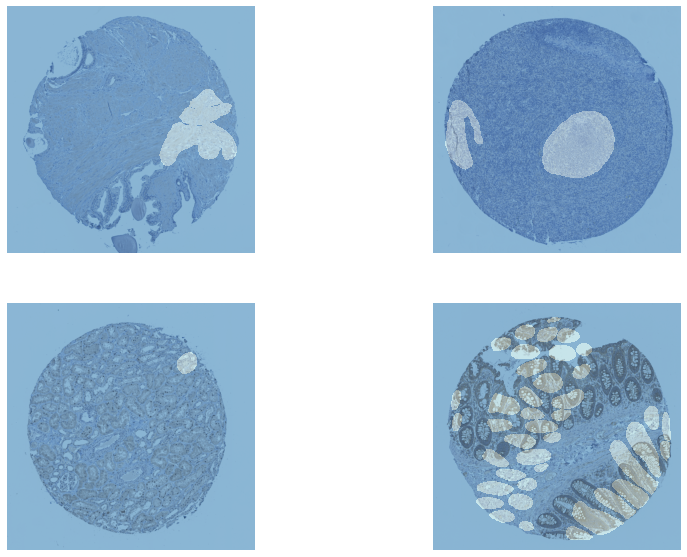

In [16]:
dls.show_batch(max_n=4, vmin=1, vmax=30, figsize=(14,10))